<a href="https://colab.research.google.com/github/ndsmngsen/Diamondpredection/blob/main/Currentversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we need to import the needed libraries

In [76]:
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings (to ignore unimportant warnings)
import warnings
warnings.filterwarnings("ignore")

import joblib


Next, lets load the data in from the .csv file

In [ ]:
# Load the dataset
df = pd.read_csv("diamonds.csv")
# Display the first few rows
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We need to modify the dataframe to prepare it for plotting and analysis

In [ ]:
#makes the column names more clear
df = df.rename(columns={
    "x": "length_mm",
    "y": "width_mm",
    "z": "depth_mm",
    "depth": "depth_%"
})

# Drop the first column
df = df.drop(columns=["Unnamed: 0"])

# Display the first few rows to confirm the change
df.head()

,carat,cut,color,clarity,depth_%,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Additionally, we need to make some of these qualititive values in features like cut, color, and clarity quantitative

In [ ]:
# set values for cut quality
new_cut = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

# Apply values to dataframe
df["cut"] = df["cut"].map(new_cut)

# set values for colors
new_color = { "J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7 }

# Apply values to dataframe
df["color"] = df["color"].map(new_color)

# set values for clarity
new_clarity = {
    "I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5,
    "VVS2": 6, "VVS1": 7, "IF": 8
}

# Apply mapping to the clarity column
df["clarity"] = df["clarity"].map(new_clarity)

# Display the first few rows to confirm
df.head()



,carat,cut,color,clarity,depth_%,table,price,length_mm,width_mm,depth_mm
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


Now, let's run some descriptive statistics and generate some plots to derive insights

In [ ]:
# Descriptive Statistics
df.describe()

,carat,cut,color,clarity,depth_%,table,price,length_mm,width_mm,depth_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Some observations:
1. length, width, and depth have zero as min values, indicating that they may need to be dropped
2. Some values, like the max values for carat and price, are extreme. Outliers may need to removed from the data frame.
3. It would be best to visualize a few features against price to spot outliers visually and make tweaks to the dataframe.

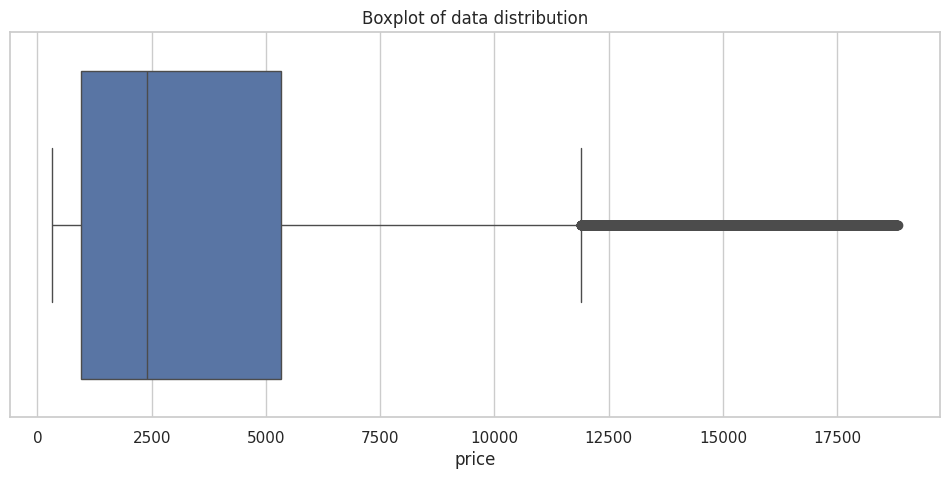

In [ ]:
# Boxplot of data distribution
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of data distribution')
plt.show()

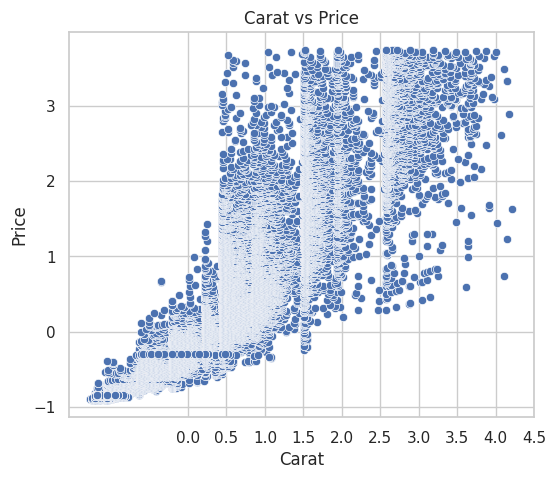

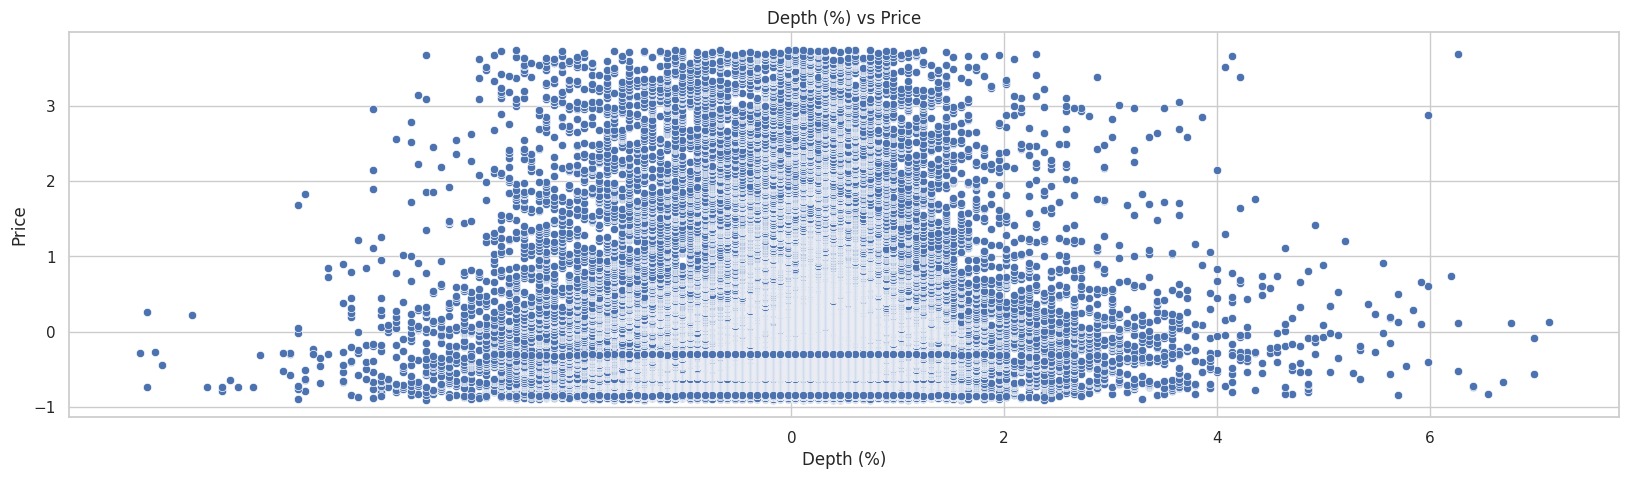

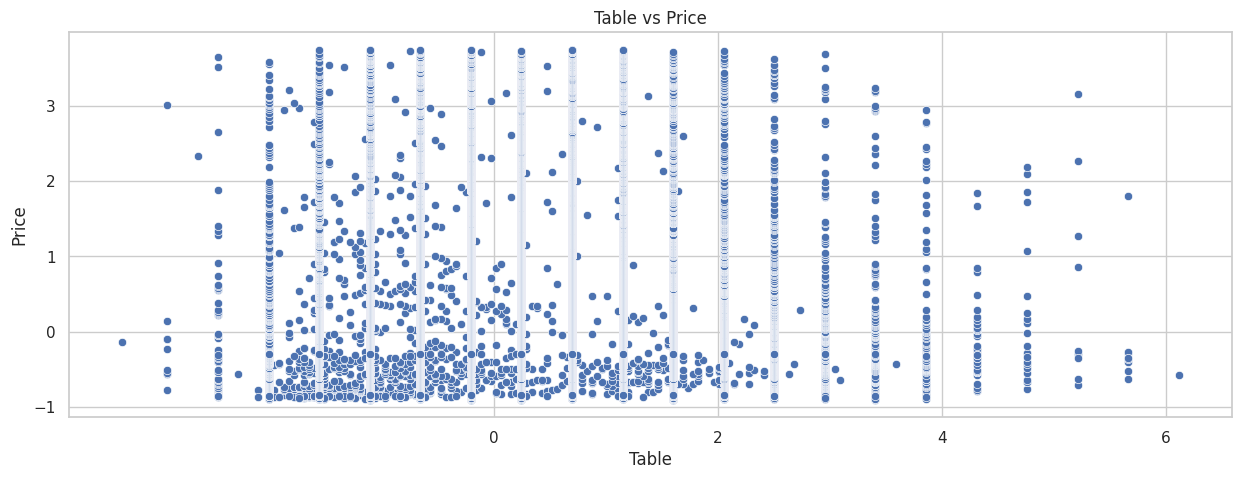

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot carat vs price
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='carat', y='price')
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
# adjust ticks to make it easier to see where to place restriction
plt.xticks(np.arange(0, max(df['carat'])+0.5, 0.5))
plt.show()

# Plot depth_% vs price
plt.figure(figsize=(20, 5))
sns.scatterplot(data=df, x='depth_%', y='price')
plt.title('Depth (%) vs Price')
plt.xlabel('Depth (%)')
plt.ylabel('Price')
# adjust ticks to make it easier to see where to place restriction
plt.xticks(np.arange(0, max(df['depth_%'])+0.5, 2))
plt.show()

# Plot table vs price
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='table', y='price')
plt.title('Table vs Price')
plt.xlabel('Table')
plt.ylabel('Price')
# adjust ticks to make it easier to see where to place restriction
plt.xticks(np.arange(0, max(df['table'])+0.5, 2))
plt.show()

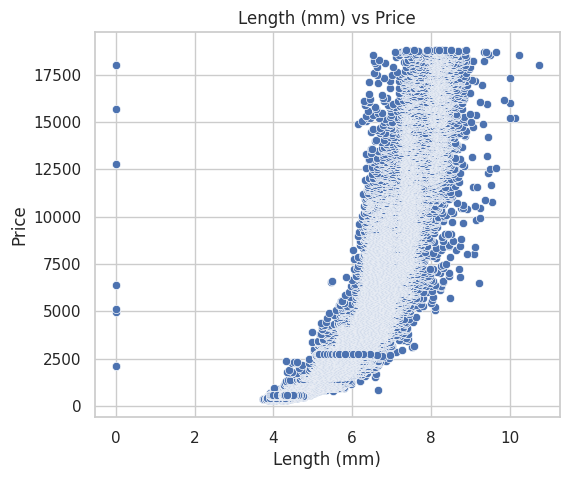

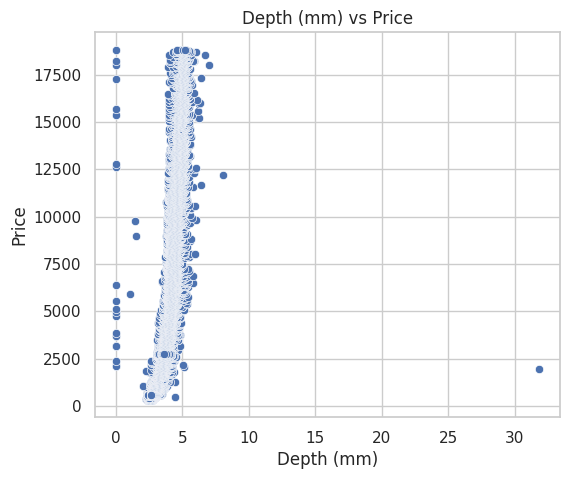

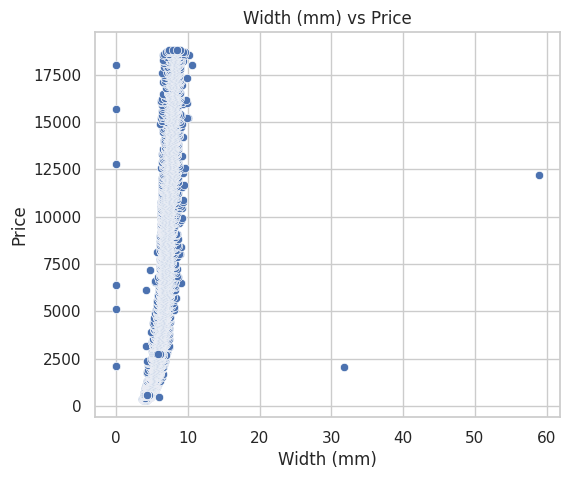

In [ ]:
# Plot length_mm vs price
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='length_mm', y='price')
plt.title('Length (mm) vs Price')
plt.xlabel('Length (mm)')
plt.ylabel('Price')
plt.show()

# Plot depth_mm vs price
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='depth_mm', y='price')
plt.title('Depth (mm) vs Price')
plt.xlabel('Depth (mm)')
plt.ylabel('Price')
plt.show()

# Plot width_mm vs price
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='width_mm', y='price')
plt.title('Width (mm) vs Price')
plt.xlabel('Width (mm)')
plt.ylabel('Price')
plt.show()

These scatter plots have been useful for getting a visual understanding of the relationship between the individual features and price.

We will also use these plots to identity outliers. To keep things simple, we will be eliminating outliers by restricting the dataframe to not include extreme values.

In [ ]:
df = df[
    (df['length_mm'] > 2) & (df['length_mm'] < 9) &
    (df['depth_mm'] > 1) & (df['depth_mm'] < 7) &
    (df['width_mm'] > 1) & (df['width_mm'] < 30) &
    (df['carat'] < 3) &
    (df['depth_%'] > 53) & (df['depth_%'] < 72) &
    (df['table'] > 50) & (df['table'] < 72)

]


(0, 10)


,carat,cut,color,clarity,depth_%,table,length_mm,width_mm,depth_mm,price


Next, we still need to do some work on the data. Let's start by scaling it so that all features have equal weight. Let's also create a heatmap to understand correlations between variables

In [ ]:
# features
features = ['carat', 'cut', 'color', 'clarity', 'depth_%', 'table', 'length_mm', 'width_mm', 'depth_mm']


X = df[features]
y = df['price']

#We will scale the target and features seperately because I want to inverse scale the MAE
#So I can get the MAE in dollars and not scaled units.
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features
X_scaled = scaler_X.fit_transform(X)

# Scale the target
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Reshaped for scaling

# Combine for plotting and modeling
df= pd.DataFrame(X_scaled, columns=features)
df['price'] = y_scaled

df.head()


,carat,cut,color,clarity,depth_%,table,length_mm,width_mm,depth_mm,price
0,-1.207276,0.981343,0.936496,-1.247906,-0.176810,-1.107310,-1.595371,-1.581425,-1.608161,-0.904491
1,-1.249970,0.084147,0.936496,-0.640337,-1.381174,1.600262,-1.649199,-1.707922,-1.782436,-0.904491
2,-1.207276,-1.710243,0.936496,0.574801,-3.435677,3.405311,-1.505658,-1.500106,-1.782436,-0.904239
3,-1.079195,0.084147,-1.415786,-0.032768,0.460795,0.246476,-1.371087,-1.355539,-1.317703,-0.902479
4,-1.036502,-1.710243,-2.003856,-1.247906,1.098399,0.246476,-1.245488,-1.247113,-1.143429,-0.902227


The head function confirms that the data is now scaled when compared to the last time it was called. Now let's create a heatmap

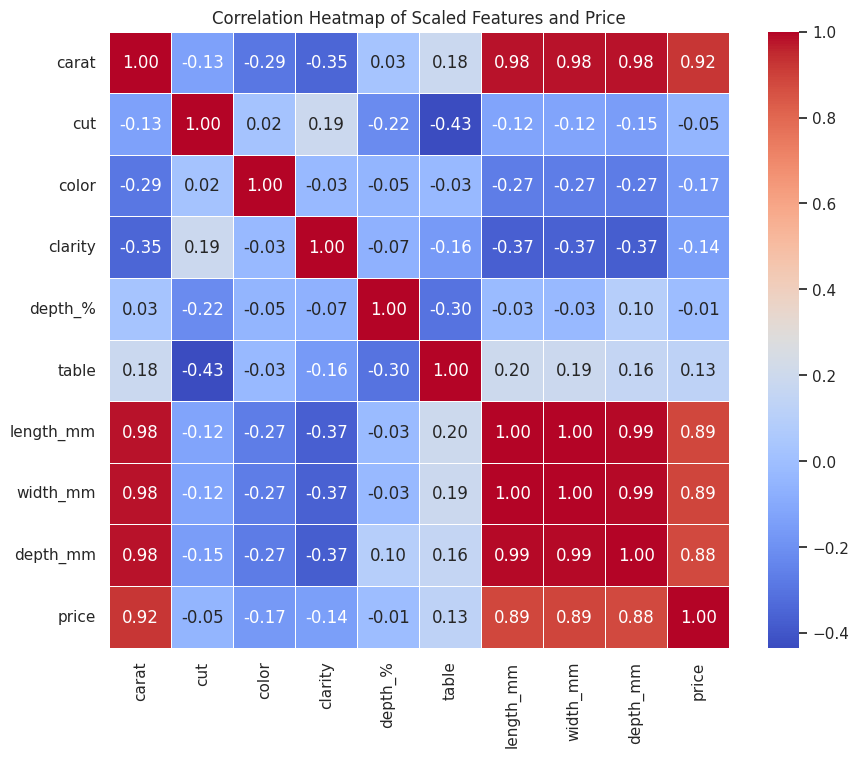

In [ ]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_scaled.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Scaled Features and Price')
plt.show()

Length, width, depth, carat, and price all correlate fairly highly with eachother. I will still be using the other features like color and clarity because they are widely considered to have an impact on a diamond's price. I'll consider dropping it if out model accuracy and effeciency is not good.

Now, since the relationships in the splot seem somewhat nonlinear, I think using random forest would be better than multiple linear regresion. I'll use both and compare their preformance to eachother.

In [78]:

X = df.drop(columns=['price'])
y = df['price']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# make models
lin = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training
lin.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Save your Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')

from google.colab import files
files.download('random_forest_model.pkl')

# Predictions
yhat_lin = lin.predict(X_test)
yhat_rf = rf.predict(X_test)

# Evaluate
mae_lin = mean_absolute_error(y_test, yhat_lin)
r2_lin = r2_score(y_test, yhat_lin)

mae_rf = mean_absolute_error(y_test, yhat_rf)
r2_rf = r2_score(y_test, yhat_rf)

# Print evaluation results
print(f"Linear Regression - MAE: {mae_lin:.2f}, R²: {r2_lin:.2f}")
print(f"Random Forest - MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Linear Regression - MAE: 805.27, R²: 0.91
Random Forest - MAE: 266.57, R²: 0.98


the r sqaured is high, indiciating that the model is accruate at predicting price. Both the MAE (Mean Absolute Error) and R sqaured score of the random forest model are better than the multiple linear regression model

In [ ]:
# Inverse transform only the target variable (price) using the scaler for price
y_actual_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))  # Actual prices
yhat_rf_dollars = scaler_y.inverse_transform(yhat_rf.reshape(-1, 1))  # Predicted prices


# Calculate MAE on the original price scale
mae_original = mean_absolute_error(y_actual_original, yhat_rf_dollars)
print(f"MAE in original price scale: ${mae_original:.2f}")

MAE in original price scale: $271.12


The dataset I am using was last updated 8 years ago. So, I will adjust the predicted prices (yhat_rf) for inflation. 1 dollar in 2017 is equal to about 1.30 today.

In [ ]:
yhat_rf_dollars = yhat_rf_dollars* 1.30

# Show the first 10 adjusted predictions
print(yhat_rf_dollars[:10])

[[ 5531.812]
 [11747.307]
 [ 1105.143]
 [  789.152]
 [ 1671.969]
 [ 2011.789]
 [ 1202.643]
 [21056.334]
 [19237.608]
 [ 2718.43 ]]


['random_forest_model.pkl']